In [1]:
import numpy as np
# from sklearn.decomposition import PCA
import pandas as pd
# from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform, pdist
from sklearn.manifold import MDS

In [2]:
frame = pd.read_csv('./uploads/Pokemon.csv')
frame.drop(['name', 'Total', 'Generation'], axis=1, inplace=True)
frame['Legendary'] = frame['Legendary'].apply(lambda x: int(x))
lsttypes = []
for i in frame.columns:
    if(type(frame[i].iloc[0]) is str):
        continue
    else:
        lsttypes.append(i)
frame = frame[lsttypes]

In [4]:
npframe = frame[lsttypes].values

In [5]:
pca = PCA()
pca.fit(npframe)

PCA()

In [29]:
pca.explained_variance_

array([2.42147710e+08, 5.74655636e+02, 5.22075421e+02, 1.57832014e+02,
       6.48137337e+01, 3.32556175e+01, 2.04581369e+01, 1.70413359e+01,
       4.23665017e+00, 1.92338805e-01])

In [7]:
pca.explained_variance_ratio_

array([9.99994241e-01, 2.37314788e-06, 2.15600806e-06, 6.51796810e-07,
       2.67660430e-07, 1.37335290e-07, 8.44857010e-08, 7.03753825e-08,
       1.74960389e-08, 7.94299052e-10])

In [36]:
pca.components_[:2]

array([[ 8.85265782e-06,  2.61466117e-06,  2.06680807e-04,
        -3.73796174e-04,  9.99999835e-01,  5.61675666e-05,
        -3.02022263e-04, -1.81783072e-05,  2.30138369e-04,
        -2.01784195e-05],
       [-9.76458170e-02,  2.21262558e-04, -1.34228300e-01,
         9.62655211e-02,  2.57205061e-04, -7.75790134e-01,
         5.42137654e-01,  6.83382732e-03,  8.58768006e-02,
         2.44940399e-01]])

In [48]:
compo = pca.components_[:2]
nframe = frame[lsttypes]
coors = []
for idx, row in nframe.iterrows():
    
    coors.append([(row.values*compo[0]).sum(), (row.values*compo[1]).sum()])

In [52]:
import json
json.dumps({'as':12})

'{"as": 12}'

In [2]:
k1 = np.array([1,2,3])
k2 = np.array([4,5,6])

In [11]:
((k1-k2)**2).sum()

27

In [22]:

mse = []
for n in range(2,11):
    kmeans = KMeans(n_clusters=n, random_state=0).fit(frame.values)
    mse.append(kmeans_estimate(frame, kmeans))

/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/usr/local

In [17]:
def kmeans_estimate(frame, kmeans):
    frame['label'] = kmeans.labels_
    centers = kmeans.cluster_centers_
    num_centroid = len(centers)
    mse = 0
    for i in range(num_centroid):
        subframe = frame[frame['label'] == i]
        subframe.drop(['label'], axis=1, inplace=True)
        center = centers[i]
        for j in range(len(subframe)):
            mse = ((subframe.iloc[j].values - center)**2).sum()
    frame.drop(['label'], axis=1, inplace=True)
    return mse

Text(0.5, 1.0, 'Mean square error of clusters')

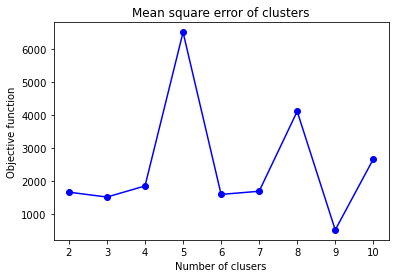

In [23]:
plt.plot(range(2,11), mse, 'bo-')
plt.xlabel('Number of clusers')
plt.ylabel('Objective function')
plt.title('Mean square error of clusters')

In [24]:
mse

[1657.5877062541135,
 1510.65644911724,
 1845.56177662037,
 6503.686854338842,
 1590.3432946865898,
 1685.3033844655472,
 4105.28185595568,
 514.1150519031144,
 2658.4861111111104]

In [8]:
dissim = pd.DataFrame(squareform(pdist(frame)), columns=frame.index, index=frame.index)

In [11]:
varsim = frame.corr()
embedding = MDS(n_components=2, dissimilarity='precomputed')
var_points = embedding.fit_transform(varsim)

In [12]:
var_points1 = pd.DataFrame(var_points)

In [13]:
var_points1

,0,1
0,0.100176,0.016043
1,-0.275885,0.029683
2,0.049621,-0.158198
3,0.262782,-0.189207
4,-0.188628,0.212287
5,-0.044805,-0.099707
6,0.096738,0.189099


In [14]:
var_points

array([[ 0.1001762 ,  0.01604295],
       [-0.27588511,  0.02968277],
       [ 0.04962134, -0.1581981 ],
       [ 0.26278233, -0.18920693],
       [-0.18862824,  0.21228703],
       [-0.04480461, -0.09970665],
       [ 0.09673809,  0.18909893]])